## An example of a false-positive in the field of solar—terrestrial research:## 
### Relationship between cosmic rays and extremes of the Indian Monsoon###

[Dr. Benjamin A. Laken](http://www.benlaken.com), Department of Geosciences, [University of Oslo](http://www.mn.uio.no/geo/english/people/aca/metos/blaken/), Norway

e-mail: [blaken@geo.uio.no](mailto:blaken@geo.uio.no?subject=Solar-Monsoon Github Notebook), twitter: [@benlaken](https://twitter.com/benlaken)

**Summary:** A litany of research has been published claiming strong Solar influences on the Earth's weather and climate. Much of this work includes documented errors and false-positives, yet is still frequently used to substantiate arguments of global warming denial. [Badruddin & Aslam (2014)](http://www.sciencedirect.com/science/article/pii/S1364682614002697), hereafter referred to as BA14, have recently reported a link between solar activity and extremes in the Indian Monsoon. They further speculated that the relationship they observed may apply across the entire tropical and sub-tropical belt, and be of global importance. However, their statistical analysis rested on the assumption that their data followed a Student's $t$-distribution. This notebook reproduces their results, and demonstrates why their claims are unsupported by their analysis.

Their error resulted from the assumption that their datasets underlying distribution was essentially Gaussian, this assumption was built into their statistical test. However, as demonstrated below, their data closely follow an ergodic chaotic distribution biased towards extreme values. From a probability density function (PDF), calculated using a Monte Carlo (MC) sampling approach, I show that far from being uncommon, the samples they obtained are actually from the most statistically likely portion of the distribution.

**Note :** *I served as reviewer for this article in two separate journals (EPSL and JASTP). Despite my recommendation JASTP accepted the work with minor changes.*

In [1]:
# Code is compatible with both Python 2.7 or 3.X
# NB. past module required for python 3 users (https://pypi.python.org/pypi/past)
from __future__ import print_function, division, generators
import sys
print("Running Python {0}.{1}".format(  
    sys.version_info[:2][0],sys.version_info[:2][1]))
if sys.version_info[:2] > (3, 0):
    print("Adding xrange for backwards compatibility".format(
            sys.version_info[:2][0],sys.version_info[:2][1]))
    from past.builtins import xrange
#from __future__ import print_function,division,generators
%pylab inline
from scipy.stats.stats import pearsonr
import pandas as pd
import datetime as dt

Running Python 2.7
Populating the interactive namespace from numpy and matplotlib


### 1. Read data###

Fetch the required data from CSV files held on a public server. Then automatically create date objects, and remove the original date column (leaving it only as an index).

In [2]:
monsoon = pd.read_csv('http://www.files.benlaken.com/documents/Monsoon_data.csv', parse_dates=['Date'])
# nb. you may also download the file from the below link (although this will not work for fetching the data at runtime)
# https://github.com/benlaken/Comment_BadruddinAslam2014/blob/master/Data/Monsoon_data.csv
monsoon.index = monsoon.Date
monsoon = monsoon.drop('Date', 1) 
#monsoon # Uncomment this and you will get the PD dataframe preview of Precipitation data

In [3]:
olou = pd.read_csv('http://www.files.benlaken.com/documents/Olou_counts.csv', parse_dates=['Date'])
# nb. you may also download the file from the below link (although this will not work for fetching the data at runtime)
#https://github.com/benlaken/Comment_BadruddinAslam2014/blob/master/Data/Olou_counts.csv
olou.index = olou.Date
olou = olou.drop('Date', 1) 
#olou  # Uncomment this and you will get the PD dataframe preview of NM data

In [4]:
# Produce a monthly climatology of Precipitation data
sclimo = [np.mean(monsoon.Precip[monsoon.index.month == (mnth+1)]) for mnth in xrange(12)]

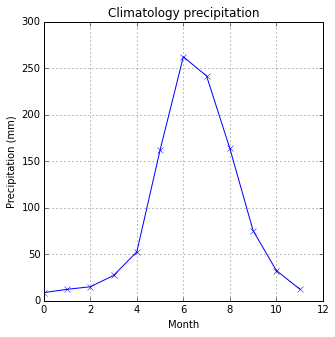

In [5]:
# Plot the climatology
my_climo = plt.figure()
my_climo.set_size_inches(5,5)              # Specify the output size
ax1 = my_climo.add_subplot(111)            # Add an axis frame object to the plot (i.e. a pannel)

ax1.plot(sclimo,'bx-')

ax1.set_title(r'Climatology precipitation')
ax1.set_ylabel(r'Precipitation (mm)')
ax1.set_xlabel(r'Month')
ax1.grid(True)

plt.show(my_climo)
#my_ts.savefig('Monthly_ts.pdf',dpi=300)    # Uncomment this to save the figure

In [6]:
# Calculate the 𝛿 precip. (monthly precpiptation anomaly with respect to seasonal climatology)
delta = []
ind = 0
for n in monsoon.Precip:
    delta.append(n - sclimo[ind])
    ind += 1
    if ind == 12: ind = 0    
dseries = pd.Series(delta, index=monsoon.index)

### 2. Plot time-series data###

A quick plot of the data to give a rough idea of what we are working from.

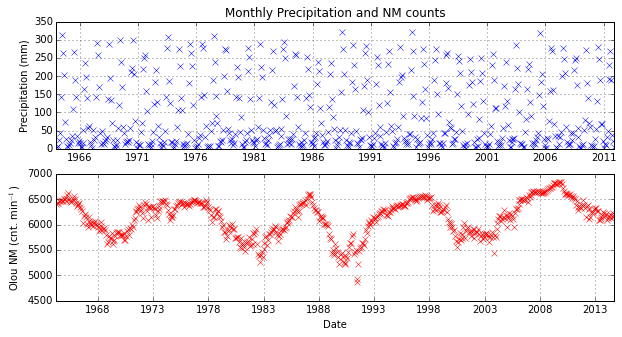

In [7]:
# Plot time series 
my_ts = plt.figure()
my_ts.set_size_inches(10,5)         # Specify the output size
ax1 = my_ts.add_subplot(211)        # Add an axis frame object to the plot (i.e. a pannel)
ax2 = my_ts.add_subplot(212) 

ax1.plot(monsoon.index.date,monsoon.Precip,'bx')

ax1.set_title(r'Monthly Precipitation and NM counts')
ax1.set_ylabel(r'Precipitation (mm)')
ax1.grid(True)
#ax1.set_yscale('log')

ax2.plot(olou.index.date,olou.Counts,'rx')
ax2.set_ylabel(r'Olou NM (cnt. min$^{-1}$)')
ax2.set_xlabel('Date')
ax2.grid(True)

plt.show(my_ts)
#my_ts.savefig('Monthly_ts.pdf',dpi=300)

In [8]:
# Calculate the precipitation anomaly
jjas_index = [(monsoon.index.month == 6) | (monsoon.index.month == 7) |
     (monsoon.index.month == 8) | (monsoon.index.month == 9)]

jjas_means =[]
jjas_SEM = []
jjas_sum=[]
for yr in arange(1964,2012,1):
    ttmp = ((monsoon.index.year == yr) & (monsoon.index.month >= 6)& (monsoon.index.month <= 9))
    jjas_means.append(np.mean(dseries[ttmp]))
    jjas_SEM.append(np.std(dseries[ttmp])/np.sqrt(np.count_nonzero(ttmp)-1))
    jjas_sum.append(np.sum(dseries[ttmp]))    

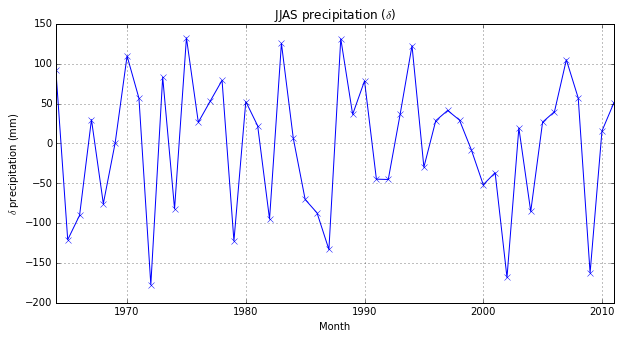

In [9]:
# Plot precipitation anomaly
yrange = arange(1964,2012,1)
my_jjas = plt.figure()
my_jjas.set_size_inches(10,5)         # Specify the output size
ax1 = my_jjas.add_subplot(111)        # Add an axis frame object to the plot (i.e. a pannel)

ax1.plot(yrange,jjas_sum,'bx-')
ax1.set_xlim(1964,2011)
ax1.set_title(r'JJAS precipitation ($\delta$)')
ax1.set_ylabel(r'$\delta$ precipitation (mm)')
ax1.set_xlabel(r'Month')
ax1.grid(True)
plt.show(my_jjas)

[Badruddin & Aslam (2014)](http://www.sciencedirect.com/science/article/pii/S1364682614002697) took the largest/smallest 12 years of 𝛿 precipitation data, and composited corresponding Oulu pressure-adjusted neutron monitor count (counts per min) data during the May--September months for these 12 years. He calculated the linear regressions of these composites, obtaining a Pearson's *r*-value and *p*-value. They found that during the drought (D) composite the $r$ values were negative, while during the flood (F) composite the *r*-value was positive. The associated *p*-values appear to be statistically significant, however, these *p*-values are based on a Student's t-test (assuming a Gaussian distribution).

### 3. Composites of 'Drought' and 'Flood'  years classified by $\delta$ precip. 

|Drought | Flood
| ------------- |:-------------:| -----:|
|1965  | 1964|
|1966 | 1970|
|1968 | 1971|
|1972 |1973|
|1974  |1975|
|1979 |1978|
|1982  |1983|
|1986 |1988|
|1987  |1990|
|2002 |1994|
|2004  |2007|
|2009 |2008|



In [10]:
drought_years = [1965,1966,1968,1972,1974,1979,1982,1986,1987,2002,2004,2009]
flood_years = [1964,1970,1971,1973,1975,1978,1983,1988,1990,1994,2007,2008]

In [11]:
def make_cframe(c_years):
    '''
    Small function to take a list of composite years (c_years)
    and create a numpy array (c_years,months) for analysis.
    Also returns back a month-wise set of means, and SEM values.
    '''
    c_group =np.zeros((12,12),dtype=float) 
    for n,yr in enumerate(c_years):
        tmp = olou.index.year == yr
        for i in xrange(len(olou.Counts[tmp])):
            c_group[n,i]= olou.Counts[tmp][i]
    aaa = np.where(c_group == 0)  # clean up any errors within
    c_group[aaa]=np.nan
    c_means=[]
    c_errors=[]
    for i in xrange(12):
        c_means.append(np.nanmean(c_group[:,i]))   # per month, all years
        c_errors.append(np.nanstd(c_group[:,i])/(
                    np.sqrt(np.count_nonzero(c_group[:,i]))-1.))
    return c_group,c_means,c_errors

In [12]:
d_group,d_means,d_errors =make_cframe(drought_years)
f_group,f_means,f_errors =make_cframe(flood_years)

In [13]:
d_means=np.array(d_means)* 0.001
f_means=np.array(f_means)* 0.001
d_errors=np.array(d_errors)* 0.001    # Make the values smaller for plotting
f_errors=np.array(f_errors) * 0.001

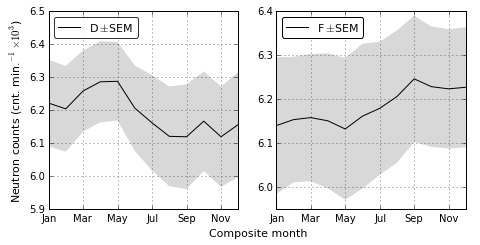

In [14]:
# nb. http://www.elsevier.com/author-schemas/artwork-and-media-instructions/artwork-sizing
# according to Elseveers figure guide, double width images should be 190mm, single should be 90mm
# Python requires size in inches. For a double width image (as below) at a 2:1 aspect this 
# translates to 7.48:3.54   (for single column 1:1 should be 3.54:3.54). Pub resoltion = 300dpi
mrange = arange(0,12)
xlabs =['Jan','Mar','May','Jul','Sep','Nov']

# Plot time series 
my_comps = plt.figure()
my_comps.set_size_inches(7.48,3.54)         # Specify the output size

big_ax = my_comps.add_subplot(111)
big_ax.set_axis_bgcolor('none')
big_ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
big_ax.set_frame_on(False)
big_ax.set_ylabel(r"Neutron counts (cnt. min.$^{-1} \times10^{3}$)", fontsize=11)
big_ax.set_xlabel(r"Composite month", fontsize=11)

ax1 = my_comps.add_subplot(121)        # Add an axis frame object to the plot (i.e. a pannel)
ax2 = my_comps.add_subplot(122) 

ax1.plot(mrange,d_means,'k-')
ax1.fill_between(mrange,(d_means-d_errors),(d_means + d_errors),color='gray',linewidth=0.1,alpha=0.3)
ax1.set_xticklabels(xlabs)
ax1.set_xlim(0,11)

leg1=ax1.legend([r'D$\pm$SEM'], loc=2,prop={'size':11},
                numpoints=1,markerscale=5.,frameon=True,fancybox=True)
leg1.get_frame().set_alpha(0.8)

ax2.plot(mrange,f_means,'k-')
ax2.fill_between(mrange,(f_means-f_errors),(f_means + f_errors),color='gray',linewidth=0.1,alpha=0.3)
ax2.set_xlim(0,11)
ax2.set_xticklabels(xlabs)

leg2=ax2.legend([r'F$\pm$SEM'], loc=2,prop={'size':11},
                numpoints=1,markerscale=5.,frameon=True,fancybox=True)
leg1.get_frame().set_alpha(0.8)

ax1.grid(True)
ax2.grid(True)

plt.show(my_comps)
my_comps.savefig('Composite_samples.pdf',dpi=300)

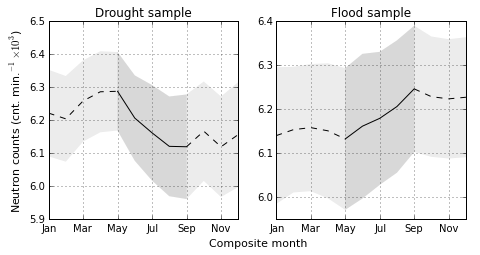

In [15]:
# Same plot as above, only this time, I want to emphasise the May to September period of BA14,
# without removing the rest of the data (which is also useful for people to see...)
# So I will need diffrent line properties at diffrent periods...
my_comps2 = plt.figure()
my_comps2.set_size_inches(7.48,3.54)         # Specify the output size

big_ax = my_comps2.add_subplot(111)
big_ax.set_axis_bgcolor('none')
big_ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
big_ax.set_frame_on(False)
big_ax.set_ylabel(r"Neutron counts (cnt. min.$^{-1} \times10^{3}$)", fontsize=11)
big_ax.set_xlabel(r"Composite month", fontsize=11)

ax1 = my_comps2.add_subplot(121)          # Add an axis frame object to the plot (i.e. a pannel)
ax2 = my_comps2.add_subplot(122) 

ax1.plot(mrange[0:5],d_means[0:5],'k--')  # Line for Jan to May months
ax1.plot(mrange[4:9],d_means[4:9],'k-')   # Line for May to Sep months
ax1.plot(mrange[8:],d_means[8:],'k--')    # Line for Sep to Dec months

ax1.fill_between(mrange[0:5],(d_means[0:5]-d_errors[0:5]),(d_means[0:5] +  # Fill for Jan to May months
                                        d_errors[0:5]),color='gray',linewidth=0.1,alpha=0.15)

ax1.fill_between(mrange[4:9],(d_means[4:9]-d_errors[4:9]),(d_means[4:9] +  # Fill for May to Sep months
                                        d_errors[4:9]),color='gray',linewidth=0.1,alpha=0.3)

ax1.fill_between(mrange[8:],(d_means[8:]-d_errors[8:]),(d_means[8:] +      # Fill for Sep to Dec months
                                        d_errors[8:]),color='gray',linewidth=0.1,alpha=0.15)
ax1.set_xticklabels(xlabs)
ax1.set_xlim(0,11)
ax2.set_xlim(0,11)
ax2.set_xticklabels(xlabs)

ax2.plot(mrange[0:5],f_means[0:5],'k--')  # Line for Jan to May months
ax2.plot(mrange[4:9],f_means[4:9],'k-')   # Line for May to Sep months
ax2.plot(mrange[8:],f_means[8:],'k--')    # Line for Sep to Dec months

# Fill for Jan to May months
ax2.fill_between(mrange[0:5],(f_means[0:5]-f_errors[0:5]),(f_means[0:5] + 
                                        f_errors[0:5]),color='gray',linewidth=0.1,alpha=0.15)
# Fill for May to Sep months
ax2.fill_between(mrange[4:9],(f_means[4:9]-f_errors[4:9]),(f_means[4:9] + 
                                        f_errors[4:9]),color='gray',linewidth=0.1,alpha=0.3)
# Fill for Sep to Dec months
ax2.fill_between(mrange[8:],(f_means[8:]-f_errors[8:]),(f_means[8:] + 
                                        f_errors[8:]),color='gray',linewidth=0.1,alpha=0.15)

ax1.set_title('Drought sample')
ax2.set_title('Flood sample')
ax1.grid(True)
ax2.grid(True)
plt.show(my_comps2)
my_comps2.savefig('Composite_samples2.pdf',dpi=300)

In [16]:
# BA14 used 5 months starting in May (position 4 in the array)
rval_d,pval_d = pearsonr([0,1,2,3,4],d_means[4:9])              # These are the exact r-values BA14 obtained
rval_f,pval_f = pearsonr([0,1,2,3,4],f_means[4:9])
print('Drought r,p:',rval_d, pval_d)
print('Flood r,p:',rval_f, pval_f)

Drought r,p: -0.948588869333 0.0138848701964
Flood r,p: 0.991113274336 0.00100430760755


### 4. Monte Carlo: r-values from May-Sep of random groups of 12 years

In [17]:
#                                  MonteCarlo Function
#                       -------------------------------------
import random                
def MonteCarlo(s_size,iter_num):
    mc_array = []
    subs = arange(1964,2012,1)                      # possible years
    for n in xrange(iter_num):                      # Begin the Monte Carlo loop (of size iter_num).
        print('\r Loop '+str(n),end='')
        rnd_lookup = random.sample(subs,s_size)     # Draw a random set of n=s_size subs
        rnd_group,rnd_means,rnd_errors =make_cframe(rnd_lookup)
        rval,pval = pearsonr([0,1,2,3,4],rnd_means[4:9])    
        mc_array.append(rval)
    mc_array = np.array(mc_array)
    print('Finished MC process')
    return mc_array

In [18]:
#mc_array = MonteCarlo(12,100000)  # If you want to generate the MC again, uncomment here
#np.savetxt('mc_results.txt',mc_array,fmt='%7.4f')  # Uncomment if you want to save your own MC output here

In [19]:
# Reproduce the specific set of random results which I generated the publication plot from:
# A run of of 100,000 iterations (800kb csv file)
# nb. you may also download the file from the below link (although this will not work for fetching the data at runtime)
#'https://github.com/benlaken/Comment_BadruddinAslam2014/blob/master/Data/Monsoon_MC_saved.csv'
print('Reading MC data from file of earlier runs from public URL')
tmp =pd.read_csv('http://www.files.benlaken.com/documents/Monsoon_MC_saved.csv')
mc_array = np.array(tmp.mc_results,dtype=float)
tmp=[]

Reading MC data from file of earlier runs from public URL


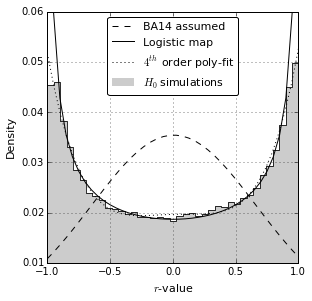

In [20]:
# Calculate the distribution based on a logistical map assuming chaotic ergodic distribution
# r-values ranging from approx. -1 to +1
inc = 0.05
aline = arange(-0.95,(0.95 + inc),inc)

# Analytical prediction of p(u) = 1/(π√1 − u2)
p = [(1./(np.pi*(np.sqrt(1-(r*r))))) for r in aline]
pp = p/sum(p)

bsize = len(pp)

# Histogram information
n, bins, patches = ax1.hist(mc_array, bsize, normed=False,facecolor='blue', alpha=0.75,
                            histtype='stepfilled')
density = n/sum(n)

# need to center the bins:
step = (bins[1] - bins[0]) *0.5
bcenter = [ bpos + step for bpos in bins[:-1]]

width = bins[1] - bins[0]
xx = np.ravel(zip(bins[0:-1], bins[0:-1] + width))
yy = np.ravel(zip(density, density))

z = np.polyfit(bcenter, density, 4)
f = np.poly1d(z)
x_new = np.linspace(bins[0], bins[-1], bsize)
y_new = f(x_new)

# Create an ideal Gaussian dist. (norm.)- the distribution BA14 assumed, and source of their error. 
mu, sigma = np.mean(mc_array), np.std(mc_array)        # Idealized Gaussian...
ygauss = normpdf(bins, mu, sigma)                      # ...a np function to generate a Gaussian pdf
ynormgauss = ygauss/sum(ygauss)                        #...a normalized guassian function

#-----Plotting-----
my_hist1 = plt.figure()
my_hist1.set_size_inches(4.5,4.5)          # Specify the output size
ax1 = my_hist1.add_subplot(111)            # Add an axis frame object to the plot (i.e. a pannel)
#ax1.set_position(pos=[0.0,0.9,.8,0.8])

ax1.plot(bins,ynormgauss,'k--',linewidth=1.) # Ideal Gaussian line (BA14 assumed distribution)

ax1.bar(bins[0:-1], density, width=width, facecolor='k',linewidth=0.0,alpha=0.2)  # Filled bars
ax1.plot(aline,pp,'k-',lw=1.)              # Logisticalmap
ax1.plot(x_new, y_new,'k:',lw=1)           # Polynomial


ax1.grid(True)
ax1.set_ylabel(r'Density',fontsize=11)
ax1.set_xlabel('$r$-value',fontsize=11)
ax1.set_ylim(0.01,0.06)

leg1=ax1.legend(['BA14 assumed','Logistic map',r'$4^{th}$ order poly-fit',r'$H_{0}$ simulations'], loc=9,prop={'size':11},
                numpoints=1,markerscale=5.,frameon=True,fancybox=True)
leg1.get_frame().set_alpha(1.0)              # Make the ledgend semi-transparent

ax1.plot(xx, yy, 'k',alpha=0.8)             # Edges for the step plot

#ax1.set_xlim(-1,1)
ax1.set_ylabel(r'Density',fontsize=11)
ax1.set_xlabel('$r$-value',fontsize=11)
plt.show(my_hist1)

my_hist1.savefig('Density_models.pdf',dpi=300)

### 5. Calculate $p$-value against Logistic Map###

Calculate a PDF for a chaotically fluctuating value ranging from -1 to +1, which covers all values (ergodic), and spends most of the time at extreme values:

$p(u)=\frac{1}{\pi\sqrt{1-u^{2}}}$

In [21]:
print('For a reminder')
print('Drought and Flood sample r-values were:', rval_d,rval_f)
print('Traditional tests indicate p-values of:', pval_d,pval_f)

For a reminder
Drought and Flood sample r-values were: -0.948588869333 0.991113274336
Traditional tests indicate p-values of: 0.0138848701964 0.00100430760755


In [23]:
# ---- Logistic solution ----
p_d = (1./(np.pi*(np.sqrt(1-(rval_d*rval_d)))))
probability_d = (p_d /sum(p))

p_f = (1./(np.pi*(np.sqrt(1-(rval_f*rval_f)))))
probability_f = (p_f /sum(p))

print('Probability of the Drought and Flood sample r-values from Logistic Map:')
print(probability_d, probability_f)

Probability of the Drought and Flood sample r-values from Logistic Map:
0.0589677255522 0.140308568128


### 6. Calculate $p$-value from 4$^{th}$ order Polynomial fit###

Fit with another (simpler) and independent method, using a polynomial, and predict the density (which indicates $p$-value) for the Drought and Flood samples.

In [23]:
print('Polynomial function:')
print(f)

Polynomial function:
         4             3          2
0.03625 x - 0.0002797 x - 0.0037 x + 0.0007109 x + 0.01964


In [25]:
print('Probability of the Drought and Flood sample r-values from 4th order Polynomial fit:')
print(f(rval_d), f(rval_f))

Probability of the Drought and Flood sample r-values from 4th order Polynomial fit:
0.04522835747 0.0514184647265


### Conclusion###

Contrary to the claims of [Badruddin & Aslam (2014)](http://www.sciencedirect.com/science/article/pii/S1364682614002697), trends in the cosmic ray flux during extremes of the Monsoon were not unusual. The significance of linear regressions of neutron monitor data during Drought and Flood conditions over the Indian Monsoon period are considerably over-estimated by traditional statistical methods, which assumed incorrectly that the data may be accurately represented by a Student's t-distribution. 

The correlation coefficients resulting from these data are essentially drawn from ergodic chaotically oscillating data--the inevitable result of compositing monthly time-scale periods randomly over data that follow the Solar Cycle. This led BA14 to considerably over-estimate the statistical significance of their samples and interpret the high r-values they obtained as indicative of a physical relationship between the Monsoon and cosmic ray flux. As I have shown however, far from being unusual, the high $r$-values were actually the most common values in the distribution.